### Importaciones

In [1]:
import numpy as np
import pandas as pd 
import h2o
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from h2o.automl import H2OAutoML
from src.predicting_functions import *

/home/rodrigo/miniconda3/envs/ironhack/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
train = pd.read_csv('./Data/train_clean.csv')
test = pd.read_csv('./Data/test_clean.csv')

### Exploración de datos limpios

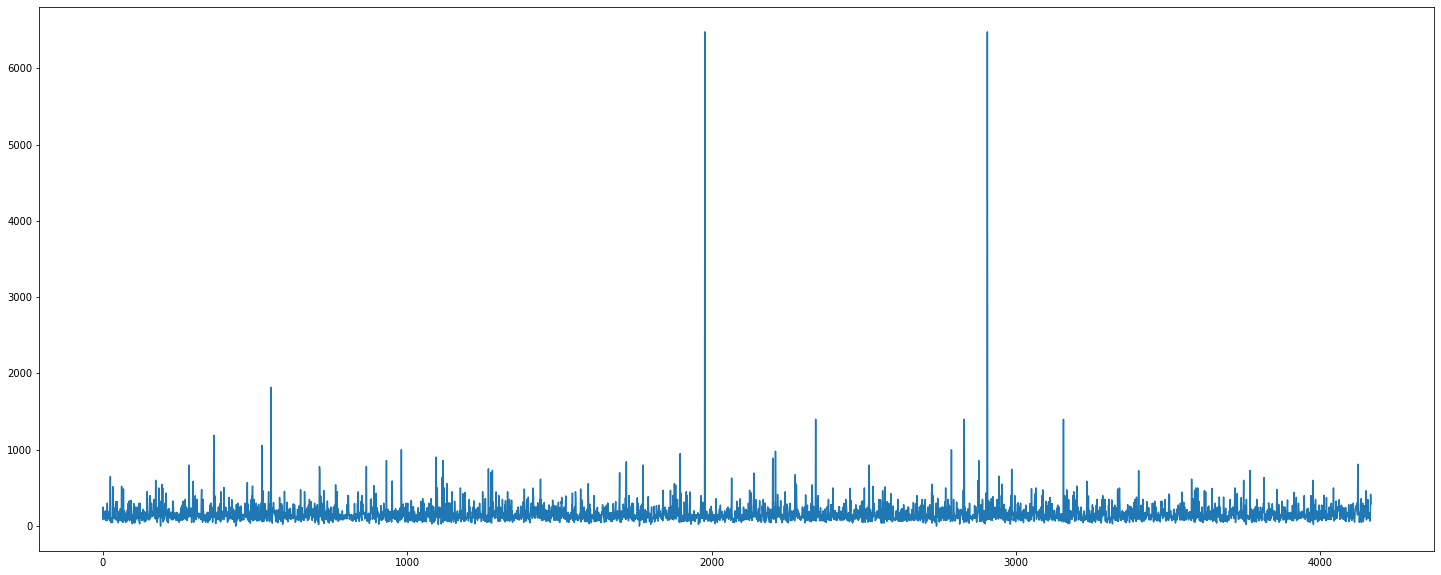

In [3]:
train.price.plot(figsize=(25,10));

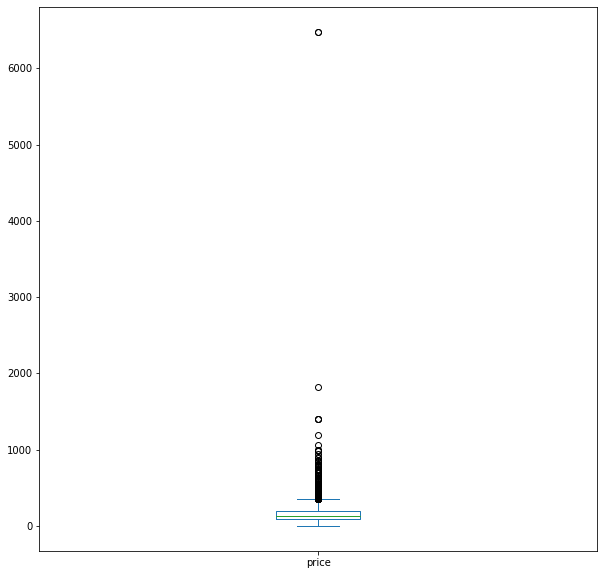

In [4]:
train.price.plot(kind='box',figsize=(10,10));

Se van a eliminar los dos puntos de data que se salen tanto del resto

In [3]:
train.drop(index = list(train[train.price>3000].index), inplace=True)

Se exploran los datos con PCA

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pylab as plt

data=StandardScaler().fit_transform(train.drop(columns="price"))


pca=PCA()

pca.fit(data)


pca.explained_variance_ratio_

array([1.12739803e-01, 6.56854272e-02, 3.23816368e-02, 2.95269589e-02,
       2.76366237e-02, 2.55445371e-02, 2.49528001e-02, 2.17459527e-02,
       2.06784899e-02, 1.86323771e-02, 1.71847456e-02, 1.67978556e-02,
       1.66116070e-02, 1.60097662e-02, 1.59091967e-02, 1.55540647e-02,
       1.54974105e-02, 1.53108918e-02, 1.52427153e-02, 1.47637751e-02,
       1.46297509e-02, 1.45855557e-02, 1.44626078e-02, 1.43898530e-02,
       1.42970132e-02, 1.42821242e-02, 1.41051646e-02, 1.40065245e-02,
       1.39715826e-02, 1.38611044e-02, 1.36450617e-02, 1.34938449e-02,
       1.33127458e-02, 1.31025759e-02, 1.29526064e-02, 1.28205101e-02,
       1.26910000e-02, 1.23181647e-02, 1.18649318e-02, 1.15750584e-02,
       1.11491935e-02, 1.08003118e-02, 1.04071391e-02, 1.03621850e-02,
       1.00511617e-02, 9.73340077e-03, 9.13482852e-03, 9.04913780e-03,
       8.55792627e-03, 8.12220176e-03, 8.10866450e-03, 7.85833676e-03,
       7.43268276e-03, 7.11202186e-03, 6.86811718e-03, 6.66643912e-03,
      

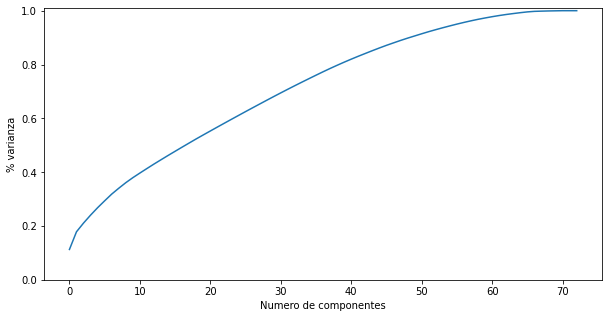

In [7]:
plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0, 1.01]);

In [8]:
columns_no_import=[
    'latitude', 'longitude', 'Bijlmer-Centrum', 'Bijlmer-Oost',
    'Bos en Lommer', 'Buitenveldert - Zuidas', 'Centrum-Oost',
    'Centrum-West', 'De Aker - Nieuw Sloten', 'De Baarsjes - Oud-West',
    'De Pijp - Rivierenbuurt', 'Gaasperdam - Driemond',
    'Geuzenveld - Slotermeer', 'IJburg - Zeeburgereiland', 'Noord-Oost',
    'Noord-West', 'Oostelijk Havengebied - Indische Buurt', 'Osdorp',
    'Oud-Noord', 'Oud-Oost', 'Slotervaart', 'Watergraafsmeer', 'Westerpark',
    'Zuid']

### Búsqueda de modelos

Asignación de datos para entrenamiento y testeo

In [4]:
X, y = train.drop(columns="price"), train.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [10]:
modelos=[ElasticNet(), LinearRegression(), Lasso(), Ridge(), SVR(), RandomForestRegressor(n_estimators=20), DecisionTreeRegressor(max_depth=10), ExtraTreeRegressor(max_depth=10),
        SGDRegressor(), KNeighborsRegressor(), GradientBoostingRegressor(n_estimators=50), XGBRegressor(verbosity=0), CatBoostRegressor(verbose=0)]
           
for m in modelos:
    prueba_modelo(m, X_train, y_train, X_test, y_test)

ElasticNet()
Train: 0.31355544260063584
Test: 0.3933185265575462


LinearRegression()
Train: 0.3912378078835663
Test: 0.43867100951726834


Lasso()
Train: 0.3614401900725994
Test: 0.4366905120328455


Ridge()
Train: 0.39055291476133713
Test: 0.43931522868966144


SVR()
Train: -0.044742963624363474
Test: -0.06216606018552118


RandomForestRegressor(n_estimators=20)
Train: 0.8820156339714289
Test: 0.4163204194893564


DecisionTreeRegressor(max_depth=10)
Train: 0.7866814097719118
Test: 0.01105578185268874


ExtraTreeRegressor(max_depth=10)
Train: 0.8355370921153645
Test: -0.11324854453571409


SGDRegressor()
Train: -4.2900740723171036e+24
Test: -5.006550799088783e+24


KNeighborsRegressor()
Train: 0.3288354029737748
Test: 0.01456442041583117


GradientBoostingRegressor(n_estimators=50)
Train: 0.5068905219491373
Test: 0.44870257981018546




/home/rodrigo/miniconda3/envs/ironhack/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/rodrigo/miniconda3/envs/ironhack/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)
Train: 0.9861790255932861
Test: 0.3393959079438035


Train: 0.8931942632734612
Test: 0.4887962565953422




De los modelos entrenados, si hay algún modelo que puede predecir el precio de forma acceptable  se ejecuta para el test

In [6]:
export_modelo(CatBoostRegressor(verbose=0,depth=3), X, y, test)

Ahora se va a utilizar h2o para ver si hay alguna mejora

In [ ]:
def h2o_function(n_models):
    h2o.init()

    train_h2o = h2o.H2OFrame(train)
    test_h2o = h2o.H2OFrame(test)

    X=train_h2o.columns
    y='price'
    X.remove(y)

    train_h2o[y] = train_h2o[y]

    aml=H2OAutoML(max_models = (n_models))

    aml.train(x=X, y=y, training_frame=train_h2o)

    print(aml.leaderboard)
    
    sample=pd.read_csv('./Data/sample.csv')

    sample.price = aml.leader.predict(test_h2o).as_data_frame()

    sample.to_csv('./Data/sample.csv',index=False)

In [ ]:
h2o_function(10)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.20.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.20.04, mixed mode, sharing)
  Starting server from /home/rodrigo/miniconda3/envs/ironhack/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8y8vbinl
  JVM stdout: /tmp/tmp8y8vbinl/h2o_rodrigo_started_from_python.out
  JVM stderr: /tmp/tmp8y8vbinl/h2o_rodrigo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_rodrigo_tbgq03
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.680 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_2_AutoML_1_20220224_210103,7536.43,86.8126,7536.43,48.2919,0.396835
StackedEnsemble_AllModels_5_AutoML_1_20220224_210103,7536.97,86.8157,7536.97,48.1902,0.397221
StackedEnsemble_AllModels_1_AutoML_1_20220224_210103,7566.09,86.9833,7566.09,48.4634,0.398065
StackedEnsemble_BestOfFamily_3_AutoML_1_20220224_210103,7591.85,87.1312,7591.85,48.4467,nan
StackedEnsemble_BestOfFamily_6_AutoML_1_20220224_210103,7594.84,87.1484,7594.84,48.3877,nan
StackedEnsemble_BestOfFamily_2_AutoML_1_20220224_210103,7600.99,87.1836,7600.99,48.6081,nan
StackedEnsemble_BestOfFamily_1_AutoML_1_20220224_210103,7679.9,87.635,7679.9,49.2421,nan
GBM_3_AutoML_1_20220224_210103,7709.3,87.8026,7709.3,49.4863,0.404172
GBM_2_AutoML_1_20220224_210103,7728.94,87.9144,7728.94,49.6771,0.408048
GBM_4_AutoML_1_20220224_210103,7788.24,88.251,7788.24,50.0099,0.406487



stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
